# IE 326 Term Project: Used Car Prices Prediction

In this study, used car prices will be predicted using a past dataset via some machine learning methods. Before applying these methods, we need to prepare the dataset.

1- Necessary libraries are imported.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2- The dataset is read.

In [3]:
df = pd.read_csv("car_price.csv", on_bad_lines='skip')

3- Let's see general information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


4- Also, here we will see the shape of the dataset.

In [5]:
df.shape

(558811, 16)

So, it is seen that there are 558,811 instances and 16 variables in the dataset.

5- Now, let's preview the dataset.

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


6- Let's describe the dataset.

In [7]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


7- Detect dublicates if any exists.

In [8]:
len(df)

558811

In [9]:
df = df.drop_duplicates()
len(df)

558811

So, there are no duplicate values in this dataset.

8- Let's check whether any spaces in the column names.

In [10]:
col_names = df.columns
col_names

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

It seems that there is no problem in the name of columns, but, to guarantee it, let's remove if any existing spaces.

In [11]:
df.columns = df.columns.str.strip()
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

9- Here, we are going to check the datatypes of each column one by one:

In [12]:
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


10- To guarantee that all data points are proper, we need to check and delete data points with wrong datatypes. Here is code for it:

In [13]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
interior         0.134035
odometer         0.016821
year             0.000000
vin              0.000000
state            0.000000
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

According to this analysis: 11.69% of transmission, 2.36% of body, 2.11% of condition and so on values are missing.

11- Column names will be stored as col_names to represent it clearly.

In [14]:
col_names=df.columns

12 - In this study, the target variable is sellingprice, meaning that this variable is the one that we desire to predict. Other variables are predictor variables or features.

13- Since the target variable is selling price, we will check distribution of sellingprice column.

In [15]:
df['sellingprice'].value_counts()

11000     4453
12000     4450
13000     4334
10000     4030
14000     3898
          ... 
28350        1
30201        1
131500       1
31550        1
27840        1
Name: sellingprice, Length: 1887, dtype: int64

14- Here, we will view the percentage distribution of sellingprice column.

In [16]:
df['sellingprice'].value_counts()/np.float(len(df))

11000     0.007969
12000     0.007963
13000     0.007756
10000     0.007212
14000     0.006976
            ...   
28350     0.000002
30201     0.000002
131500    0.000002
31550     0.000002
27840     0.000002
Name: sellingprice, Length: 1887, dtype: float64

15- Checking the number of unique values.

In [17]:
df.select_dtypes(include="object").nunique()

make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
color               20
interior            17
seller           14264
saledate          3745
dtype: int64

# **Imputing missing values**

17- Checking of transmission data and filling the missing values.

In [18]:
updated_df = df.copy()
updated_df.transmission.unique()

array(['automatic', nan, 'manual'], dtype=object)

<Axes: >

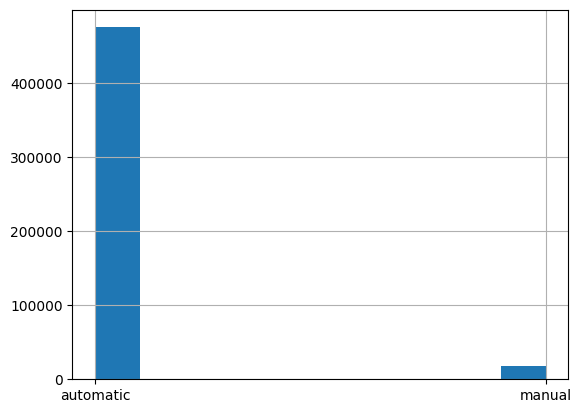

In [19]:
updated_df['transmission'].hist() 

In [20]:
updated_df['transmission'].mode()[0]

'automatic'

The mode of this column is "automatic". Therefore, missing data in the transmission column has been updated "automatic".

In [21]:
updated_df.transmission = updated_df.transmission.fillna("automatic")

In [22]:
updated_df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [23]:
updated_df.transmission.unique()

array(['automatic', 'manual'], dtype=object)

18- Checking of make and filling the missing values.

In [24]:
updated_df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

There are problems with the data. 
1. Lower and upper case. For example: "Kia" or "kia"
2. Short and long definition. For example: "volkswagen" or "vw"

In [25]:
updated_df.make = updated_df.make.str.lower()
updated_df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [26]:
round(updated_df.make.value_counts()/sum(updated_df.make.value_counts())*100,2)

ford          17.14
chevrolet     11.05
nissan         9.85
toyota         7.29
dodge          5.64
              ...  
dot            0.00
hyundai tk     0.00
mazda tk       0.00
dodge tk       0.00
lotus          0.00
Name: make, Length: 66, dtype: float64

An overwhelming 17% of most cars are ford. Therefore, missing data in the make column has been updated by "ford".

In [27]:
updated_df.make.fillna("ford", inplace=True)
updated_df.isnull().sum()

year                0
make                0
model           10399
trim            10651
body            13195
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [28]:
def cleaned_make(batch):
    for index, value in batch.iteritems():
        if "chev" in value:
            batch[index] = "chevrolet"
        elif "ford" in value:
            batch[index] = "ford" 
        elif "hyundai" in value:
            batch[index] = "hyundai" 
        elif "vw" in value:
            batch[index] = "volkswagen" 
        elif "dodge" in value:
            batch[index] = "dodge"
        elif "merced" in value:
            batch[index] = "mercedes"
        elif "mazda" in value:
            batch[index] = "mazda"
        elif "rover" in value:
            batch[index] = "landrover"
        elif "gmc" in value:
            batch[index] = "gmc"
        else:
            pass 
        
    return batch


batch_list = np.array_split(updated_df.make, 20)
    
for batch in batch_list:
    cleaned_make(batch)

new_make_series = pd.concat(batch_list, axis=0)
new_make_series.value_counts().head()



ford         104302
chevrolet     60588
nissan        54017
toyota        39966
dodge         30956
Name: make, dtype: int64

In [29]:
len(updated_df.make.unique())

66

In [30]:
updated_df.drop("make", axis=1, inplace=True)

In [31]:
updated_df["make_new"] = new_make_series

In [32]:
len(updated_df.make_new.unique())

55

In [33]:
updated_df.head()

,year,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make_new
0,2015,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia
1,2015,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia
2,2014,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw
3,2015,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),volvo
4,2014,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw


In [34]:
updated_df.make_new.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes', 'mitsubishi', 'mazda', 'mini', 'landrover',
       'lincoln', 'jaguar', 'volkswagen', 'toyota', 'subaru', 'scion',
       'porsche', 'dodge', 'fiat', 'chrysler', 'ferrari', 'honda', 'gmc',
       'ram', 'smart', 'bentley', 'pontiac', 'saturn', 'maserati',
       'mercury', 'hummer', 'saab', 'suzuki', 'oldsmobile', 'isuzu',
       'geo', 'rolls-royce', 'daewoo', 'plymouth', 'tesla', 'airstream',
       'dot', 'aston martin', 'fisker', 'lamborghini', 'lotus'],
      dtype=object)

19- Checking of model and filling the missing values

In [35]:
updated_df.model.unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',


In [36]:
len(updated_df.model.unique())

974

In [37]:
round(updated_df.model.value_counts()/sum(updated_df.model.value_counts())*100,2)

Altima        3.53
F-150         2.64
Fusion        2.36
Camry         2.29
Escape        2.16
              ... 
rrs           0.00
golf          0.00
g500          0.00
tahoe         0.00
458 Italia    0.00
Name: model, Length: 973, dtype: float64

An overwhelming 3.53% of most cars are altima. Therefore, missing data in the make column has been updated by "altima".

In [38]:
updated_df.model.fillna("Altima", inplace=True)
updated_df.isnull().sum()

year                0
model               0
trim            10651
body            13195
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
make_new            0
dtype: int64

20- Checking of trim and filling the missing values

In [39]:
len(updated_df.trim.unique())

1976

In [40]:
updated_df.trim.unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

Having 1975 different styles is a very high number for my model and may affect the model's logical conclusion. That's why we decided to delete this column.

In [41]:
round(updated_df.trim.value_counts()/sum(updated_df.trim.value_counts())*100,2)

Base                 10.18
SE                    7.96
LX                    3.79
Limited               3.35
LT                    3.09
                     ...  
xls                   0.00
4x2 reg silverado     0.00
awd v8 limited        0.00
4x2 v6 limited        0.00
Power Wagon           0.00
Name: trim, Length: 1975, dtype: float64

In [42]:
updated_df.trim.fillna("Base", inplace=True)
updated_df.isnull().sum()

year                0
model               0
trim                0
body            13195
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
make_new            0
dtype: int64

In [43]:
updated_df.head()

,year,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make_new
0,2015,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia
1,2015,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia
2,2014,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw
3,2015,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),volvo
4,2014,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw


In [44]:
updated_df.isnull().sum()

year                0
model               0
trim                0
body            13195
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
make_new            0
dtype: int64

21- Checking of body and filling the missing values

In [45]:
len(updated_df.body.unique())

87

In [46]:
updated_df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crew

There are two problems in here.
1. Lower-upper case 
2. Short and long definition

In [47]:
updated_df.body = updated_df.body.str.lower()
updated_df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', nan, 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'regular-cab'], dtype=object)

In [48]:
round(updated_df.body.value_counts()/sum(updated_df.body.value_counts())*100,2)

sedan                      44.23
suv                        26.36
hatchback                   4.81
minivan                     4.68
coupe                       3.25
crew cab                    3.00
wagon                       2.96
convertible                 1.92
supercrew                   1.66
g sedan                     1.36
supercab                    0.97
regular cab                 0.89
van                         0.83
extended cab                0.83
quad cab                    0.75
e-series van                0.33
double cab                  0.29
g coupe                     0.29
crewmax cab                 0.10
king cab                    0.10
g convertible               0.06
access cab                  0.05
genesis coupe               0.05
koup                        0.03
club cab                    0.03
cts coupe                   0.03
mega cab                    0.02
elantra coupe               0.02
promaster cargo van         0.01
beetle convertible          0.01
xtracab   

In [49]:
updated_df.body.fillna("sedan", inplace=True)
updated_df.isnull().sum()

year                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
make_new            0
dtype: int64

In [50]:
len(updated_df.body.unique())

45

In [51]:
def standardise_body_types(batch):
    '''standardises models types into specific body types'''
    for index, value in batch.iteritems():
        if "suv" in value:
            batch[index] = "suv"
        elif "sedan" in value:
            batch[index] = "sedan" 
        elif "convertible" in value:
            batch[index] = "convertible" 
        elif "hatchback" in value:
            batch[index] = "hatchback" 
        elif "coupe" in value:
            batch[index] = "coupe"
        elif "koup" in value:
            batch[index] = "coupe"
        elif "van" in value:
            batch[index] = "van"
        elif "cab" in value:
            batch[index] = "cab"
        elif "supercrew" in value:
            batch[index] = "cab"
        elif "wagon" in value:
            batch[index] = "wagon"
        else:
            pass 
        
    return batch


batch_list = np.array_split(updated_df.body, 20)
    
for batch in batch_list:
    standardise_body_types(batch)

new_body_series = pd.concat(batch_list, axis=0)
new_body_series.value_counts()

sedan          261955
suv            143844
cab             47540
van             31959
hatchback       26237
coupe           20163
wagon           16180
convertible     10933
Name: body, dtype: int64

In [52]:
updated_df.drop("body", axis=1, inplace=True)
updated_df["body_new"] = new_body_series


In [53]:
len(updated_df.body_new.unique())

8

In [54]:
updated_df.body_new.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'cab', 'van'], dtype=object)

In [55]:
updated_df.isnull().sum()

year                0
model               0
trim                0
transmission        0
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
make_new            0
body_new            0
dtype: int64

In [56]:
updated_df.head()

,year,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make_new,body_new
0,2015,Sorento,LX,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,suv
1,2015,Sorento,LX,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,suv
2,2014,3 Series,328i SULEV,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw,sedan
3,2015,S60,T5,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),volvo,sedan
4,2014,6 Series Gran Coupe,650i,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw,sedan


22- Checking of condition and filling the missing values

In [57]:
updated_df.condition.unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

In [58]:
len(updated_df.condition.unique())

42

In [59]:
updated_df['condition']=updated_df['condition'].fillna(updated_df['condition'].mean())

In [60]:
updated_df.condition.unique()

array([5.        , 4.5       , 4.1       , 4.3       , 1.        ,
       3.4       , 2.        , 4.2       , 3.        , 4.8       ,
       3.42451222, 4.9       , 1.7       , 1.9       , 2.9       ,
       3.8       , 4.4       , 4.7       , 3.2       , 4.        ,
       2.5       , 3.7       , 3.9       , 3.1       , 2.8       ,
       4.6       , 3.6       , 3.5       , 2.6       , 2.1       ,
       2.2       , 2.7       , 2.4       , 3.3       , 2.3       ,
       1.5       , 1.6       , 1.8       , 1.2       , 1.4       ,
       1.1       , 1.3       ])

We filled the missing values with the mean. 

23- Checking of odometer and filling the missing values

In [61]:
updated_df.odometer.unique()

array([ 16639.,   9393.,   1331., ..., 204835., 111069., 262065.])

In [62]:
updated_df['odometer']=updated_df['odometer'].fillna(updated_df['odometer'].mean())

In [63]:
updated_df.isnull().sum()

year              0
model             0
trim              0
transmission      0
vin               0
state             0
condition         0
odometer          0
color           749
interior        749
seller            0
mmr               0
sellingprice      0
saledate          0
make_new          0
body_new          0
dtype: int64

24- Checking of color and filling the missing values

In [64]:
updated_df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [65]:
updated_df.color.value_counts().head(25)

black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: color, dtype: int64

In [66]:
updated_df = updated_df.drop(updated_df[updated_df['color'] == "—"].index)
updated_df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [67]:
updated_df

,year,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make_new,body_new
0,2015,Sorento,LX,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,suv
1,2015,Sorento,LX,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,suv
2,2014,3 Series,328i SULEV,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw,sedan
3,2015,S60,T5,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),volvo,sedan
4,2014,6 Series Gran Coupe,650i,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw,sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,K900,Luxury,automatic,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),kia,sedan
558807,2012,2500,Power Wagon,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),ram,cab
558808,2012,X5,xDrive35d,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),bmw,suv
558809,2015,Altima,2.5 S,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),nissan,sedan


In [68]:
updated_df.color.value_counts().head(25)

black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: color, dtype: int64

In [69]:
updated_df.color.fillna("black", inplace=True)

In [70]:
updated_df.isnull().sum()

year              0
model             0
trim              0
transmission      0
vin               0
state             0
condition         0
odometer          0
color             0
interior        749
seller            0
mmr               0
sellingprice      0
saledate          0
make_new          0
body_new          0
dtype: int64

25- Checking of interior and filling the missing values

In [71]:
updated_df.interior.unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [72]:
updated_df = updated_df.drop(updated_df[updated_df['interior'] == "—"].index)
updated_df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [73]:
updated_df.interior.value_counts().head(25)

black        232332
gray         171851
beige         56937
tan           41815
brown          8136
red            1276
blue           1117
silver         1067
off-white       344
purple          320
gold            298
white           237
green           235
burgundy        176
orange          140
yellow           20
Name: interior, dtype: int64

In [74]:
updated_df

,year,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,make_new,body_new
0,2015,Sorento,LX,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,suv
1,2015,Sorento,LX,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),kia,suv
2,2014,3 Series,328i SULEV,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),bmw,sedan
3,2015,S60,T5,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),volvo,sedan
4,2014,6 Series Gran Coupe,650i,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),bmw,sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,K900,Luxury,automatic,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),kia,sedan
558807,2012,2500,Power Wagon,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),ram,cab
558808,2012,X5,xDrive35d,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),bmw,suv
558809,2015,Altima,2.5 S,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),nissan,sedan


In [75]:
updated_df.interior.value_counts().head(25)

black        232332
gray         171851
beige         56937
tan           41815
brown          8136
red            1276
blue           1117
silver         1067
off-white       344
purple          320
gold            298
white           237
green           235
burgundy        176
orange          140
yellow           20
Name: interior, dtype: int64

In [76]:
updated_df.interior.fillna("black", inplace=True)

In [77]:
updated_df.isnull().sum()

year            0
model           0
trim            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
make_new        0
body_new        0
dtype: int64

In [78]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517050 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          517050 non-null  int64  
 1   model         517050 non-null  object 
 2   trim          517050 non-null  object 
 3   transmission  517050 non-null  object 
 4   vin           517050 non-null  object 
 5   state         517050 non-null  object 
 6   condition     517050 non-null  float64
 7   odometer      517050 non-null  float64
 8   color         517050 non-null  object 
 9   interior      517050 non-null  object 
 10  seller        517050 non-null  object 
 11  mmr           517050 non-null  int64  
 12  sellingprice  517050 non-null  int64  
 13  saledate      517050 non-null  object 
 14  make_new      517050 non-null  object 
 15  body_new      517050 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 67.1+ MB


In [79]:
# find numerical variables

numerical = [var for var in updated_df.columns if updated_df[var].dtype=='int64'or updated_df[var].dtype=="float64" ]

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

print("------------")
categorical = [var for var in updated_df.columns if updated_df[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)




There are 5 numerical variables

The numerical variables are : ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
------------
There are 11 categorical variables

The categorical variables are : ['model', 'trim', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate', 'make_new', 'body_new']


We handle all od the missing values.

# Categorical Variables to Indexes

**Make_new**

In [80]:
updated_df.make_new.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes', 'mitsubishi', 'mazda', 'mini', 'landrover',
       'lincoln', 'jaguar', 'volkswagen', 'toyota', 'subaru', 'scion',
       'porsche', 'dodge', 'fiat', 'chrysler', 'ferrari', 'honda', 'gmc',
       'ram', 'smart', 'bentley', 'pontiac', 'saturn', 'maserati',
       'mercury', 'hummer', 'saab', 'suzuki', 'oldsmobile', 'rolls-royce',
       'isuzu', 'daewoo', 'plymouth', 'geo', 'tesla', 'airstream', 'dot',
       'aston martin', 'fisker', 'lamborghini', 'lotus'], dtype=object)

In [81]:
df = pd.DataFrame(updated_df.make_new.unique())
df

,0
0,kia
1,bmw
2,volvo
3,nissan
4,chevrolet
5,audi
6,ford
7,hyundai
8,buick
9,cadillac


In [82]:
unique_texts = updated_df['make_new'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [83]:
updated_df['make_index'] = updated_df['make_new'].map(text_to_index)

**Model**

In [84]:
updated_df.model.unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Q5',
       '6 Series', 'Impala', '5 Series', 'A3', 'Sonata', 'XC70', 'X5',
       'SQ5', 'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX',
       'K900', 'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8',
       'X1', 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'Mazda2', 'Rio', 'C-Class',
       '370Z', 'Soul', 'Outlander Sport', 'ES 350', 'E-Class', 'Mazda3',
       'Cooper Clubman', 'CX-9', 'Forte', 'Compass', 'JX', 'LR4',
       'Mazda5', 'M', 'Cooper', 'Range Rover Evoque', 'LS 460',
       'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt', 'XF',
       'GL-Class', 'M-C

In [85]:
df = pd.DataFrame(updated_df.model.unique())
df

,0
0,Sorento
1,3 Series
2,S60
3,6 Series Gran Coupe
4,Altima
...,...
955,RC 350
956,360
957,GLA-Class
958,TLX


In [86]:
unique_texts = updated_df['model'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [87]:
updated_df['model_index'] = updated_df['model'].map(text_to_index)

**Body_new**

In [88]:
updated_df.body_new.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'cab', 'van'], dtype=object)

In [89]:
df = pd.DataFrame(updated_df.body_new.unique())
df

,0
0,suv
1,sedan
2,convertible
3,coupe
4,wagon
5,hatchback
6,cab
7,van


In [90]:
unique_texts = updated_df['body_new'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [91]:
updated_df['body_index'] = updated_df['body_new'].map(text_to_index)

**Color**

In [92]:
updated_df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [93]:
df = pd.DataFrame(updated_df.color.unique())
df

,0
0,white
1,gray
2,black
3,red
4,silver
5,blue
6,brown
7,beige
8,purple
9,burgundy


In [94]:
unique_texts = updated_df['color'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [95]:
updated_df['color_index'] = updated_df['color'].map(text_to_index)

**Interior**

In [96]:
updated_df.interior.unique()

array(['black', 'beige', 'tan', 'gray', 'brown', 'burgundy', 'white',
       'silver', 'off-white', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [97]:
df = pd.DataFrame(updated_df.interior.unique())
df

,0
0,black
1,beige
2,tan
3,gray
4,brown
5,burgundy
6,white
7,silver
8,off-white
9,blue


In [98]:
unique_texts = updated_df['interior'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [99]:
updated_df['interior_index'] = updated_df['interior'].map(text_to_index)

**Seller**

In [100]:
updated_df.seller.unique()

array(['kia motors america, inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i -5 uhlmann rv'], dtype=object)

In [101]:
df = pd.DataFrame(updated_df.seller.unique())
df

,0
0,"kia motors america, inc"
1,financial services remarketing (lease)
2,volvo na rep/world omni
3,enterprise vehicle exchange / tra / rental / t...
4,the hertz corporation
...,...
13427,g brothers auto brokers inc
13428,quality car sales
13429,maserati north america inc
13430,alternative financial group inc


In [102]:
unique_texts = updated_df['seller'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [103]:
updated_df['seller_index'] = updated_df['seller'].map(text_to_index)

**Trim**

In [104]:
updated_df.trim.unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [105]:
df = pd.DataFrame(updated_df.trim.unique())
df

,0
0,LX
1,328i SULEV
2,T5
3,650i
4,2.5 S
...,...
1928,S E-Hybrid
1929,4.2 quattro Spyder
1930,pure
1931,EWB


In [106]:
unique_texts = updated_df['trim'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [107]:
updated_df['trim_index'] = updated_df['trim'].map(text_to_index)

**vin**

In [108]:
updated_df.vin.unique()

array(['5xyktca69fg566472', '5xyktca69fg561319', 'wba3c1c51ek116351', ...,
       '5uxzw0c58cl668465', '1n4al3ap0fc216050', '1ftfw1et2eke87277'],
      dtype=object)

In [109]:
df = pd.DataFrame(updated_df.vin.unique())
df

,0
0,5xyktca69fg566472
1,5xyktca69fg561319
2,wba3c1c51ek116351
3,yv1612tb4f1310987
4,wba6b2c57ed129731
...,...
509362,knalw4d4xf6019304
509363,3c6td5et6cg112407
509364,5uxzw0c58cl668465
509365,1n4al3ap0fc216050


In [110]:
unique_texts = updated_df['vin'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [111]:
updated_df['vin_index'] = updated_df['vin'].map(text_to_index)

**State**

In [112]:
updated_df.state.unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut', 'mo',
       'nv', 'ma', 'pr', 'ny', 'or', 'wa', 'la', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [113]:
df = pd.DataFrame(updated_df.state.unique())
df

,0
0,ca
1,tx
2,pa
3,mn
4,az
5,wi
6,tn
7,md
8,fl
9,ne


In [114]:
unique_texts = updated_df['state'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [115]:
updated_df['state_index'] = updated_df['state'].map(text_to_index)

**Saledata**

In [116]:
updated_df.saledate.unique()

array(['Tue Dec 16 2014 12:30:00 GMT-0800 (PST)',
       'Thu Jan 15 2015 04:30:00 GMT-0800 (PST)',
       'Thu Jan 29 2015 04:30:00 GMT-0800 (PST)', ...,
       'Tue Jul 07 2015 08:45:00 GMT-0700 (PDT)',
       'Thu Jul 02 2015 13:20:00 GMT-0700 (PDT)',
       'Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)'], dtype=object)

In [117]:
df = pd.DataFrame(updated_df.saledate.unique())
df

,0
0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
2,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
3,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
4,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
...,...
3691,Wed Jun 24 2015 04:45:00 GMT-0700 (PDT)
3692,Thu Jun 25 2015 07:10:00 GMT-0700 (PDT)
3693,Tue Jul 07 2015 08:45:00 GMT-0700 (PDT)
3694,Thu Jul 02 2015 13:20:00 GMT-0700 (PDT)


In [118]:
unique_texts = updated_df['saledate'].unique()
text_to_index = {text: index for index, text in enumerate(unique_texts)}

In [119]:
updated_df['saledate_index'] = updated_df['saledate'].map(text_to_index)

In [120]:
updated_df

,year,model,trim,transmission,vin,state,condition,odometer,color,interior,...,make_index,model_index,body_index,color_index,interior_index,seller_index,trim_index,vin_index,state_index,saledate_index
0,2015,Sorento,LX,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,...,0,0,0,0,0,0,0,0,0,0
1,2015,Sorento,LX,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,...,0,0,0,0,1,0,0,1,0,0
2,2014,3 Series,328i SULEV,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,...,1,1,1,1,0,1,1,2,0,1
3,2015,S60,T5,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,...,2,2,1,0,0,2,2,3,0,2
4,2014,6 Series Gran Coupe,650i,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,...,1,3,1,1,0,1,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,K900,Luxury,automatic,knalw4d4xf6019304,in,4.5,18255.0,silver,black,...,0,28,1,4,0,17,23,509362,17,1769
558807,2012,2500,Power Wagon,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,...,32,281,6,0,0,13431,1932,509363,27,976
558808,2012,X5,xDrive35d,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,...,1,19,0,2,0,1,143,509364,0,976
558809,2015,Altima,2.5 S,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,...,3,4,1,0,0,3,4,509365,13,2113


In [121]:
updated_df = updated_df.drop("model", axis=1)

In [122]:
updated_df = updated_df.drop("trim", axis=1)

In [123]:
updated_df = updated_df.drop("vin", axis=1)

In [124]:
updated_df = updated_df.drop("state", axis=1)

In [125]:
updated_df = updated_df.drop("color", axis=1)

In [126]:
updated_df = updated_df.drop("interior", axis=1)

In [127]:
updated_df = updated_df.drop("saledate", axis=1)

In [128]:
updated_df = updated_df.drop("seller", axis=1)

In [129]:
updated_df = updated_df.drop("make_new", axis=1)

In [130]:
updated_df = updated_df.drop("body_new", axis=1)

In [131]:
updated_df

,year,transmission,condition,odometer,mmr,sellingprice,make_index,model_index,body_index,color_index,interior_index,seller_index,trim_index,vin_index,state_index,saledate_index
0,2015,automatic,5.0,16639.0,20500,21500,0,0,0,0,0,0,0,0,0,0
1,2015,automatic,5.0,9393.0,20800,21500,0,0,0,0,1,0,0,1,0,0
2,2014,automatic,4.5,1331.0,31900,30000,1,1,1,1,0,1,1,2,0,1
3,2015,automatic,4.1,14282.0,27500,27750,2,2,1,0,0,2,2,3,0,2
4,2014,automatic,4.3,2641.0,66000,67000,1,3,1,1,0,1,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,automatic,4.5,18255.0,35300,33000,0,28,1,4,0,17,23,509362,17,1769
558807,2012,automatic,5.0,54393.0,30200,30800,32,281,6,0,0,13431,1932,509363,27,976
558808,2012,automatic,4.8,50561.0,29800,34000,1,19,0,2,0,1,143,509364,0,976
558809,2015,automatic,3.8,16658.0,15100,11100,3,4,1,0,0,3,4,509365,13,2113


# **Encode Categorical Variables Using `OneHotEncoder` method**

In [132]:
updated_df = pd.get_dummies(updated_df, prefix_sep='_', columns=["transmission"])

In [133]:
updated_df

,year,condition,odometer,mmr,sellingprice,make_index,model_index,body_index,color_index,interior_index,seller_index,trim_index,vin_index,state_index,saledate_index,transmission_automatic,transmission_manual
0,2015,5.0,16639.0,20500,21500,0,0,0,0,0,0,0,0,0,0,1,0
1,2015,5.0,9393.0,20800,21500,0,0,0,0,1,0,0,1,0,0,1,0
2,2014,4.5,1331.0,31900,30000,1,1,1,1,0,1,1,2,0,1,1,0
3,2015,4.1,14282.0,27500,27750,2,2,1,0,0,2,2,3,0,2,1,0
4,2014,4.3,2641.0,66000,67000,1,3,1,1,0,1,3,4,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,4.5,18255.0,35300,33000,0,28,1,4,0,17,23,509362,17,1769,1,0
558807,2012,5.0,54393.0,30200,30800,32,281,6,0,0,13431,1932,509363,27,976,1,0
558808,2012,4.8,50561.0,29800,34000,1,19,0,2,0,1,143,509364,0,976,1,0
558809,2015,3.8,16658.0,15100,11100,3,4,1,0,0,3,4,509365,13,2113,1,0


# **Detect Outlier**

In [134]:
updated_df.columns

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'make_index',
       'model_index', 'body_index', 'color_index', 'interior_index',
       'seller_index', 'trim_index', 'vin_index', 'state_index',
       'saledate_index', 'transmission_automatic', 'transmission_manual'],
      dtype='object')

<Axes: ylabel='year'>

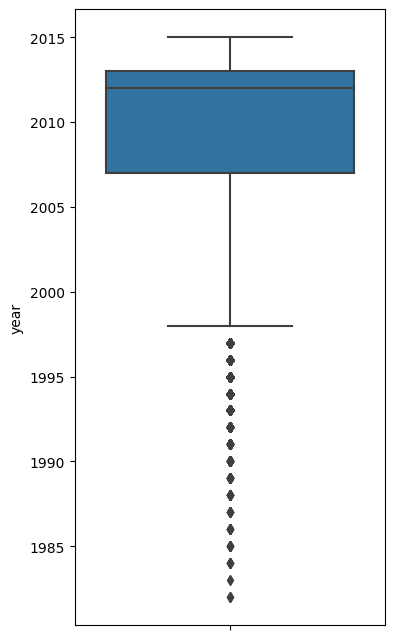

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize = (4,8))
sns.boxplot(y = updated_df.year)

<Axes: ylabel='condition'>

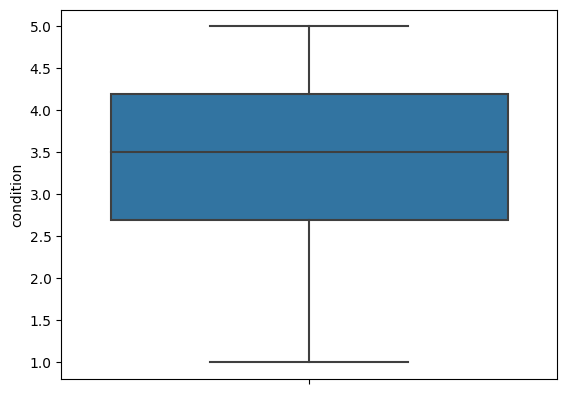

In [136]:
sns.boxplot(y = updated_df.condition)

<Axes: ylabel='odometer'>

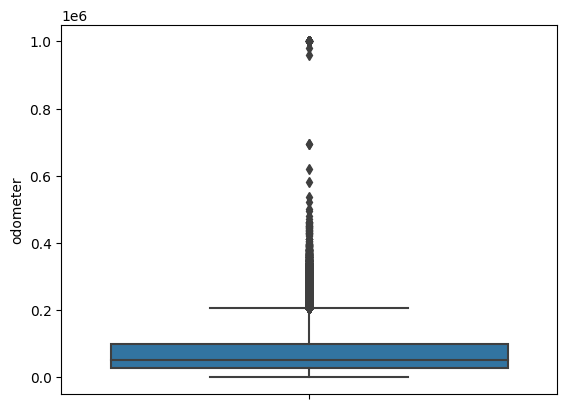

In [137]:
sns.boxplot(y = updated_df.odometer)

<Axes: ylabel='mmr'>

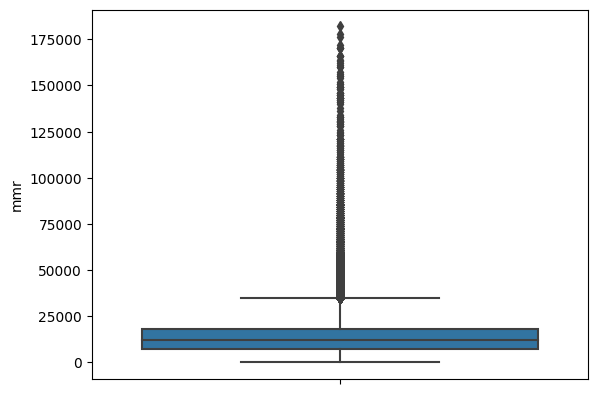

In [138]:
sns.boxplot(y = updated_df.mmr)

In [139]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [140]:
updated_df3 = updated_df.copy()
for i in updated_df.columns:
    print("\n"+i)
    out_std(updated_df,i)
    updated_df3 = updated_df3[(updated_df3[i] < upper) & (updated_df3[i] > lower)]


year
The lower bound value is 1998.1800137628086
The upper bound value is 2021.8500645661732
Total number of outliers are 5469

condition
The lower bound value is 0.5953401131211802
The upper bound value is 6.231962013730158
Total number of outliers are 0

odometer
The lower bound value is -91078.71177569493
The upper bound value is 228519.61833383673
Total number of outliers are 4834

mmr
The lower bound value is -15084.799330349502
The upper bound value is 42410.92272267133
Total number of outliers are 6359

sellingprice
The lower bound value is -15445.324222447472
The upper bound value is 42465.35916297547
Total number of outliers are 6455

make_index
The lower bound value is -18.29219321780792
The upper bound value is 43.67703414228331
Total number of outliers are 287

model_index
The lower bound value is -249.23925818647618
The upper bound value is 547.8073811919883
Total number of outliers are 10246

body_index
The lower bound value is -4.74422102414413
The upper bound value is 

In [141]:
updated_df.shape

(517050, 17)

In [142]:
updated_df3.shape

(433913, 17)

In [143]:
updated_df3.describe()

,year,condition,odometer,mmr,sellingprice,make_index,model_index,body_index,color_index,interior_index,seller_index,trim_index,vin_index,state_index,saledate_index,transmission_automatic,transmission_manual
count,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.000000,433913.0,433913.0
mean,2010.436290,3.451659,64382.074617,13577.262493,13426.636787,12.386531,134.892112,1.844169,2.581545,1.334337,1230.631297,113.168594,247736.572329,9.128623,809.836799,1.0,0.0
std,3.479981,0.916031,46727.481220,7871.373664,7972.464229,10.182647,107.634034,2.212928,2.308517,1.384968,1891.527647,143.590160,145031.294118,7.666881,752.071461,0.0,0.0
min,1999.000000,1.000000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,2008.000000,2.800000,28547.000000,8025.000000,7800.000000,4.000000,43.000000,0.000000,1.000000,0.000000,38.000000,10.000000,122875.000000,2.000000,257.000000,1.0,0.0
50%,2012.000000,3.600000,50262.000000,12500.000000,12400.000000,7.000000,131.000000,1.000000,2.000000,1.000000,300.000000,58.000000,244035.000000,8.000000,493.000000,1.0,0.0
75%,2013.000000,4.200000,93609.000000,18050.000000,18000.000000,22.000000,186.000000,2.000000,4.000000,3.000000,1431.000000,154.000000,371796.000000,13.000000,1167.000000,1.0,0.0
max,2015.000000,5.000000,228498.000000,42400.000000,42400.000000,42.000000,547.000000,7.000000,11.000000,6.000000,9145.000000,839.000000,509366.000000,32.000000,3283.000000,1.0,0.0


Because of standard deviation of transmission_ automatic and transmission_ manual are equal to 0, we eliminate these columns.

In [144]:
updated_df3.drop(["transmission_automatic", "transmission_manual"],axis=1, inplace=True)

Because of the standard deviation of condition and interior are so low, we eliminate these columns also. 

In [145]:
updated_df3.drop(["condition", "interior_index"],axis=1, inplace=True)

In [146]:
updated_df3

,year,odometer,mmr,sellingprice,make_index,model_index,body_index,color_index,seller_index,trim_index,vin_index,state_index,saledate_index
0,2015,16639.0,20500,21500,0,0,0,0,0,0,0,0,0
1,2015,9393.0,20800,21500,0,0,0,0,0,0,1,0,0
2,2014,1331.0,31900,30000,1,1,1,1,1,1,2,0,1
3,2015,14282.0,27500,27750,2,2,1,0,2,2,3,0,2
5,2015,5554.0,15350,10900,3,4,1,1,3,4,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,66403.0,20300,22800,1,15,1,0,890,14,509361,8,706
558806,2015,18255.0,35300,33000,0,28,1,4,17,23,509362,17,1769
558808,2012,50561.0,29800,34000,1,19,0,2,1,143,509364,0,976
558809,2015,16658.0,15100,11100,3,4,1,0,3,4,509365,13,2113


# Divide Dataset for x and y values 

In [147]:
y = updated_df3["sellingprice"]
updated_df3.drop(["sellingprice"],axis=1, inplace=True)
x = updated_df3

In [148]:
x

,year,odometer,mmr,make_index,model_index,body_index,color_index,seller_index,trim_index,vin_index,state_index,saledate_index
0,2015,16639.0,20500,0,0,0,0,0,0,0,0,0
1,2015,9393.0,20800,0,0,0,0,0,0,1,0,0
2,2014,1331.0,31900,1,1,1,1,1,1,2,0,1
3,2015,14282.0,27500,2,2,1,0,2,2,3,0,2
5,2015,5554.0,15350,3,4,1,1,3,4,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,66403.0,20300,1,15,1,0,890,14,509361,8,706
558806,2015,18255.0,35300,0,28,1,4,17,23,509362,17,1769
558808,2012,50561.0,29800,1,19,0,2,1,143,509364,0,976
558809,2015,16658.0,15100,3,4,1,0,3,4,509365,13,2113


In [149]:
y

0         21500
1         21500
2         30000
3         27750
5         10900
          ...  
558805    22800
558806    33000
558808    34000
558809    11100
558810    26700
Name: sellingprice, Length: 433913, dtype: int64

In [150]:
y.shape

(433913,)

# Feature Selection

**Correlation Matrix**

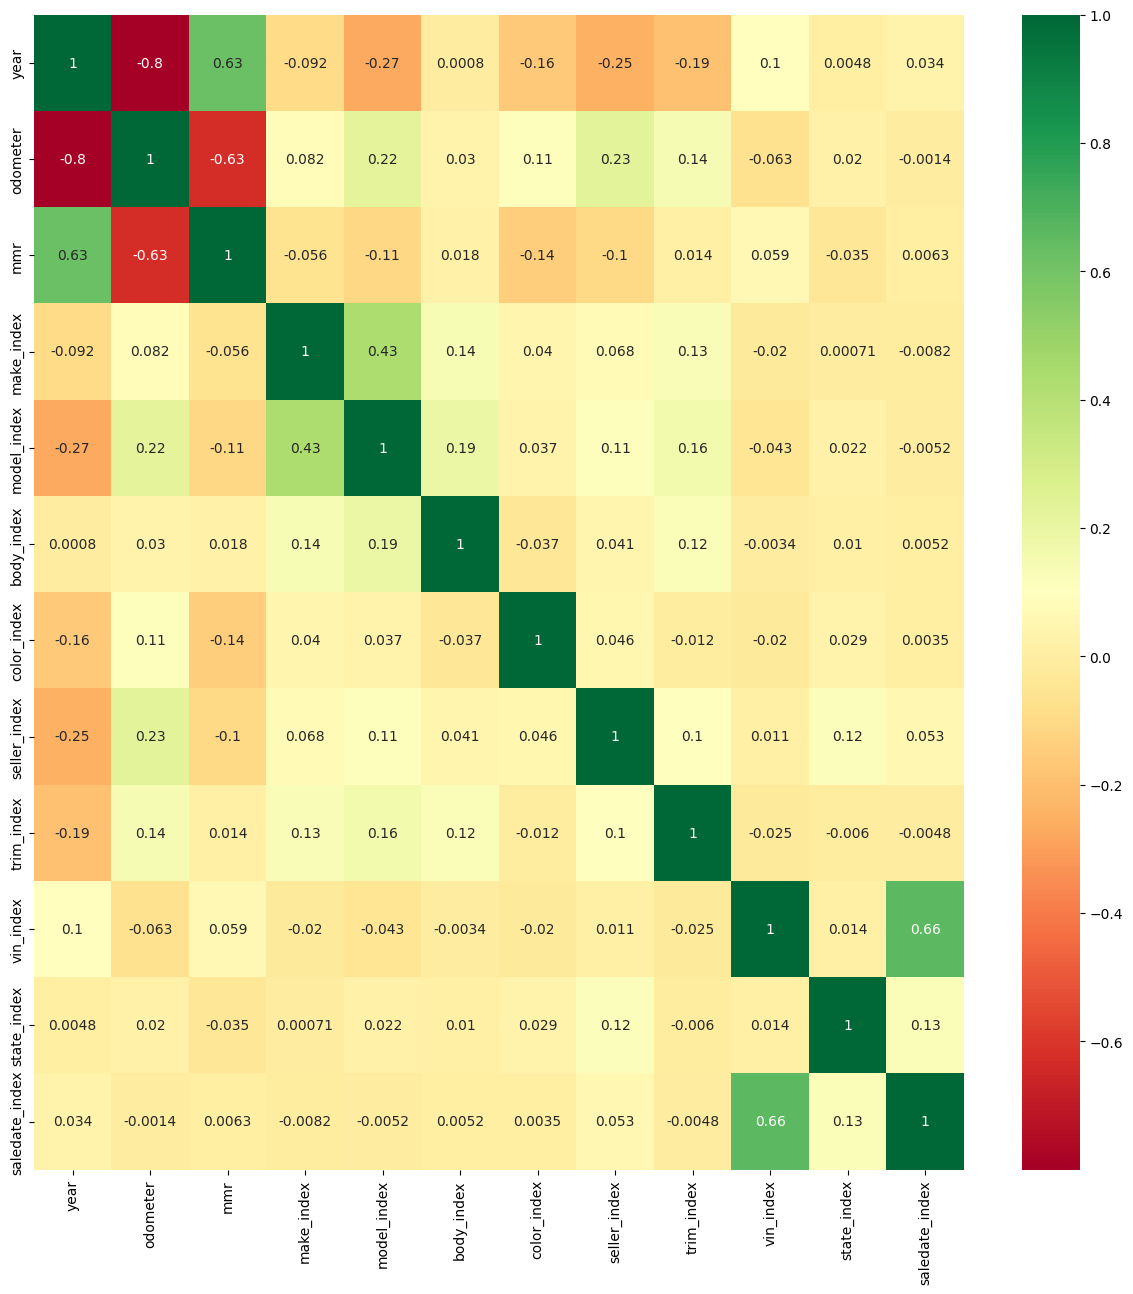

In [151]:
#get correlations of each features in dataset
corrmat = updated_df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(updated_df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**K-Best Feature Selection**

In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [153]:
bestfeatures = SelectKBest(score_func=f_regression, k=5)
new_data = bestfeatures.fit_transform(x,y)
new_data

array([[2.0150e+03, 1.6639e+04, 2.0500e+04, 0.0000e+00, 0.0000e+00],
       [2.0150e+03, 9.3930e+03, 2.0800e+04, 0.0000e+00, 0.0000e+00],
       [2.0140e+03, 1.3310e+03, 3.1900e+04, 1.0000e+00, 1.0000e+00],
       ...,
       [2.0120e+03, 5.0561e+04, 2.9800e+04, 1.9000e+01, 2.0000e+00],
       [2.0150e+03, 1.6658e+04, 1.5100e+04, 4.0000e+00, 0.0000e+00],
       [2.0140e+03, 1.5008e+04, 2.9600e+04, 1.6800e+02, 1.0000e+00]])

In [154]:
new_data=pd.DataFrame(new_data,columns=x.columns[bestfeatures.get_support()])
new_data.head()

,year,odometer,mmr,model_index,color_index
0,2015.0,16639.0,20500.0,0.0,0.0
1,2015.0,9393.0,20800.0,0.0,0.0
2,2014.0,1331.0,31900.0,1.0,1.0
3,2015.0,14282.0,27500.0,2.0,0.0
4,2015.0,5554.0,15350.0,4.0,1.0


In [155]:
new_data

,year,odometer,mmr,model_index,color_index
0,2015.0,16639.0,20500.0,0.0,0.0
1,2015.0,9393.0,20800.0,0.0,0.0
2,2014.0,1331.0,31900.0,1.0,1.0
3,2015.0,14282.0,27500.0,2.0,0.0
4,2015.0,5554.0,15350.0,4.0,1.0
...,...,...,...,...,...
433908,2011.0,66403.0,20300.0,15.0,0.0
433909,2015.0,18255.0,35300.0,28.0,4.0
433910,2012.0,50561.0,29800.0,19.0,2.0
433911,2015.0,16658.0,15100.0,4.0,0.0


# Normalize Data 

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data[["year","odometer","mmr","model_index","color_index"]]=scaler.fit_transform(new_data)

In [157]:
new_data

,year,odometer,mmr,model_index,color_index
0,1.311420,-1.021736,0.879484,-1.253249,-1.118271
1,1.311420,-1.176805,0.917597,-1.253249,-1.118271
2,1.024061,-1.349338,2.327771,-1.243958,-0.685092
3,1.311420,-1.072177,1.768783,-1.234668,-1.118271
4,1.311420,-1.258962,0.225213,-1.216086,-0.685092
...,...,...,...,...,...
433908,0.161987,0.043249,0.854075,-1.113888,-1.118271
433909,1.311420,-0.987152,2.759717,-0.993108,0.614445
433910,0.449345,-0.295781,2.060982,-1.076725,-0.251913
433911,1.311420,-1.021329,0.193453,-1.216086,-1.118271


**Train-Test Data**


In [158]:
x_new = x[["year","odometer","mmr","model_index","color_index"]]

We took the first 300000 rows as train and the others as test. Actually, we took the approximately 70% of the data for the train part.

In [159]:
x_train = x_new.iloc[:300000, :]
x_test = x_new.iloc[300000:, :]

In [160]:
x_train.shape

(300000, 5)

In [161]:
y_train = y.iloc[:300000]
y_test = y.iloc[300000:]

In [162]:
y_train.shape

(300000,)

In [171]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter values to try
param_values = [
    {'n_estimators': 1, 'random_state': 42},
    {'n_estimators': 5, 'random_state': 42},
    {'n_estimators': 10, 'random_state': 42},
    {'n_estimators': 25, 'random_state': 42},
    {'n_estimators': 50, 'random_state': 42},
    {'n_estimators': 100, 'random_state': 42},
    {'n_estimators': 200, 'random_state': 42},
    {'n_estimators': 300, 'random_state': 42},
    # Add more parameter combinations here as desired
]

best_r2 = -1
best_params = {}

# Iterate over parameter values
for params in param_values:
    # Initialize the random forest model with current parameter values
    rf_model = RandomForestRegressor(**params)

    # Train the model
    rf_model.fit(x_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(x_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)

    # Check if current R2 score is better than the best score
    if r2 > best_r2:
        best_r2 = r2
        best_params = params

    # Print current R2 score and parameters
    print("R2 Score:", r2)
    print("Current Parameters:", params)

# Print best R2 score and parameters
print("Best R2 Score:", best_r2)
print("Best Parameters:", best_params)


R2 Score: 0.9067036277345182
Current Parameters: {'n_estimators': 1, 'random_state': 42}
R2 Score: 0.9444234023704812
Current Parameters: {'n_estimators': 5, 'random_state': 42}
R2 Score: 0.9491528235739464
Current Parameters: {'n_estimators': 10, 'random_state': 42}
R2 Score: 0.9520816943227807
Current Parameters: {'n_estimators': 25, 'random_state': 42}
R2 Score: 0.9529755248265013
Current Parameters: {'n_estimators': 50, 'random_state': 42}
R2 Score: 0.9534198960876742
Current Parameters: {'n_estimators': 100, 'random_state': 42}
R2 Score: 0.9536583670259514
Current Parameters: {'n_estimators': 200, 'random_state': 42}
R2 Score: 0.9537249343029328
Current Parameters: {'n_estimators': 300, 'random_state': 42}
Best R2 Score: 0.9537249343029328
Best Parameters: {'n_estimators': 300, 'random_state': 42}


In [164]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Define parameter values to try
param_values = [
    {'n_estimators': 1, 'random_state': 42},
    {'n_estimators': 5, 'random_state': 42},
    {'n_estimators': 10, 'random_state': 42},
    {'n_estimators': 25, 'random_state': 42},
    {'n_estimators': 50, 'random_state': 42},
    {'n_estimators': 100, 'random_state': 42},
    {'n_estimators': 200, 'random_state': 42},
    {'n_estimators': 300, 'random_state': 42},
    # Add more parameter combinations here as desired
]

best_r2 = -1
best_params = {}
r2_scores = []
mse_scores = []
mape_scores = []

# Iterate over parameter values
for params in param_values:
    # Initialize the random forest model with current parameter values
    rf_model = RandomForestRegressor(**params)

    # Train the model
    rf_model.fit(x_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(x_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Check if current R2 score is better than the best score
    if r2 > best_r2:
        best_r2 = r2
        best_params = params

    # Store the scores for each parameter set
    r2_scores.append(r2)
    mse_scores.append(mse)
    mape_scores.append(mape)

    # Print current scores and parameters
    print("R2 Score:", r2)
    print("MSE:", mse)
    print("MAPE:", mape)
    print("Current Parameters:", params)

# Print best R2 score and parameters
print("Best R2 Score:", best_r2)
print("Best Parameters:", best_params)

R2 Score: 0.9067036277345182
MSE: 5936149.37114727
MAPE: 0.1894384033180479
Current Parameters: {'n_estimators': 1, 'random_state': 42}
R2 Score: 0.9444234023704812
MSE: 3536160.9144907175
MAPE: 0.15272456283336913
Current Parameters: {'n_estimators': 5, 'random_state': 42}
R2 Score: 0.9491528235739464
MSE: 3235242.9900193154
MAPE: 0.14658165404674803
Current Parameters: {'n_estimators': 10, 'random_state': 42}
R2 Score: 0.9520816943227807
MSE: 3048888.324433918
MAPE: 0.1425617902040629
Current Parameters: {'n_estimators': 25, 'random_state': 42}
R2 Score: 0.9529755248265013
MSE: 2992016.752113024
MAPE: 0.14125681334951595
Current Parameters: {'n_estimators': 50, 'random_state': 42}
R2 Score: 0.9534198960876742
MSE: 2963742.83193249
MAPE: 0.14052964849869912
Current Parameters: {'n_estimators': 100, 'random_state': 42}
R2 Score: 0.9536583670259514
MSE: 2948569.6898700874
MAPE: 0.14021587883350659
Current Parameters: {'n_estimators': 200, 'random_state': 42}
R2 Score: 0.9537249343029328

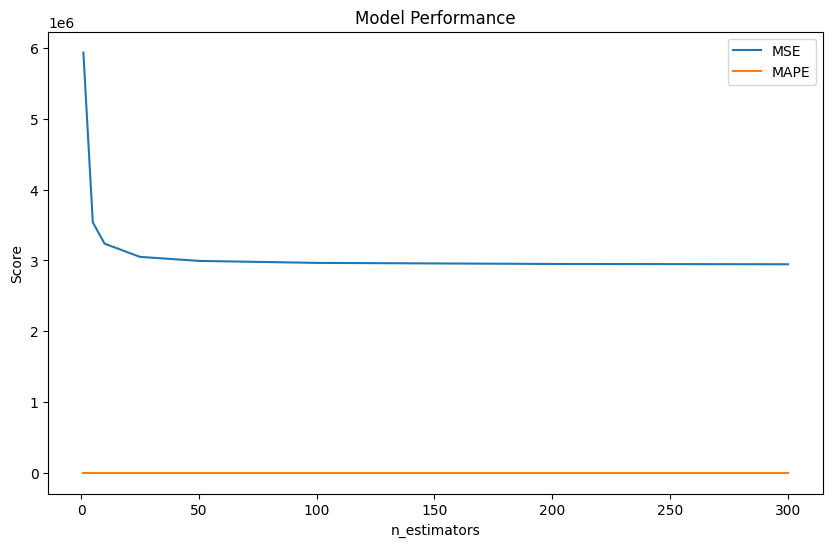

In [175]:
import matplotlib.pyplot as plt

# Değerleri ayırma
mse_scores = [5936149.37114727, 3536160.9144907175, 3235242.9900193154, 3048888.324433918,
              2992016.752113024, 2963742.83193249, 2948569.6898700874, 2944334.2272277945]
mape_scores = [0.1894384033180479, 0.15272456283336913, 0.14658165404674803, 0.1425617902040629,
               0.14125681334951595, 0.14052964849869912, 0.14021587883350659, 0.14006794558215813]

# Parametre değerlerini oluşturma
param_values = [1, 5, 10, 25, 50, 100, 200, 300]

# Grafik çizme
plt.figure(figsize=(10, 6))
plt.plot(param_values, mse_scores, label='MSE')
plt.plot(param_values, mape_scores, label='MAPE')

# Eksen ve başlık ayarları
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend()


# Grafik gösterme
plt.show()


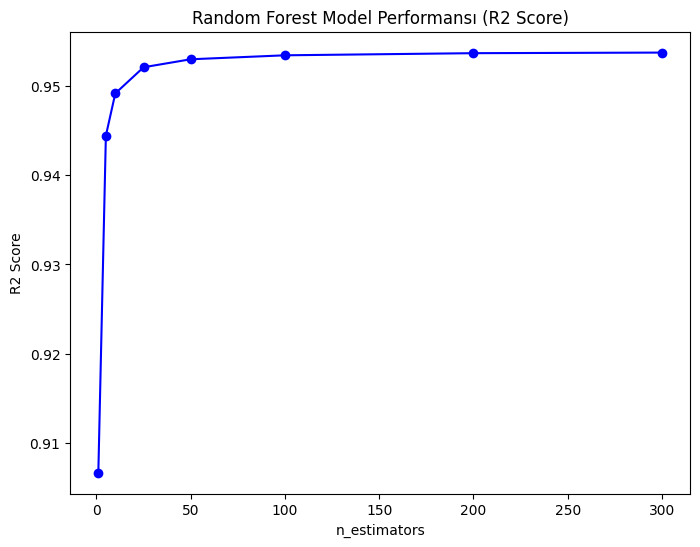

In [176]:
import matplotlib.pyplot as plt

# R2 değerlerini ayırma
r2_scores = [0.9067036277345182, 0.9444234023704812, 0.9491528235739464, 0.9520816943227807,
             0.9529755248265013, 0.9534198960876742, 0.9536583670259514, 0.9537249343029328]
param_values = [1, 5, 10, 25, 50, 100, 200, 300]

# Grafik çizme
plt.figure(figsize=(8, 6))
plt.plot(param_values, r2_scores, marker='o', linestyle='-', color='b')

# Eksen ve başlık ayarları
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.title('Random Forest Model Performance (R2 Score)')

# Grafik gösterme
plt.show()


In [177]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the random forest model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2944334.2272277945
Root Mean Squared Error (RMSE): 1715.906240803324
R-squared (R2): 0.9537249343029328


In [178]:
train_mse = mean_squared_error(y_train, rf_model.predict(x_train))
print("Train MSE:",train_mse)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:",test_mse)
train_mape = np.mean(np.abs((y_train - rf_model.predict(x_train)) / y_train)) * 100
print("Train MAPE:",train_mape)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Test MAPE:",test_mape)
train_r2 = r2_score(y_train, rf_model.predict(x_train))
test_r2 = r2_score(y_test, y_pred)
print("Train R-squared:",train_r2)
print("Test R-squared:",test_r2)

Train MSE: 367028.932858423
Test MSE: 2944334.2272277945
Train MAPE: 9.421837561210037
Test MAPE: 14.006794558215812
Train R-squared: 0.9942005445038686
Test R-squared: 0.9537249343029328
